# Air Pollution Prediction (Use Case) - SENEM AKTAŞ

### Goal : It is expected that the most successful model, which makes the most comprehensive assessment for predicting next hour air pollution using the data, is expected.

### Dataset Link: https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data

In [40]:
from IPython.display import Image
Image(url="quality.png", width = 500, height = 200)

# 1- Read And Examine Dataset CSV 

### 1-A: Reading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
#df = pd.read_csv("pollution.csv", parse_dates=True, index_col = "hour")

df= pd.read_csv("pollution.csv") # reading csv which include our dataset
print(df.shape)  #shape of the dataset - number of rows and columns

df.rename(columns={'pm2.5':'pollution'},inplace=True) #changed the name of pm2.5 -> pollution

df #reading dataset and print to screen

(43824, 13)


,No,year,month,day,hour,pollution,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


### Plot the "pollution: pollution concentration (pollution)" column. We need to look them and predict future air pollution. 

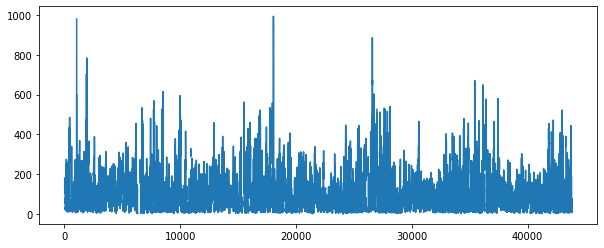

In [273]:
df['pollution'].plot(figsize=(10,4))

### Plot all the other columns as well in a plot to examine the curves of all of them at the same time.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8f7130a10>,
      dtype=object)

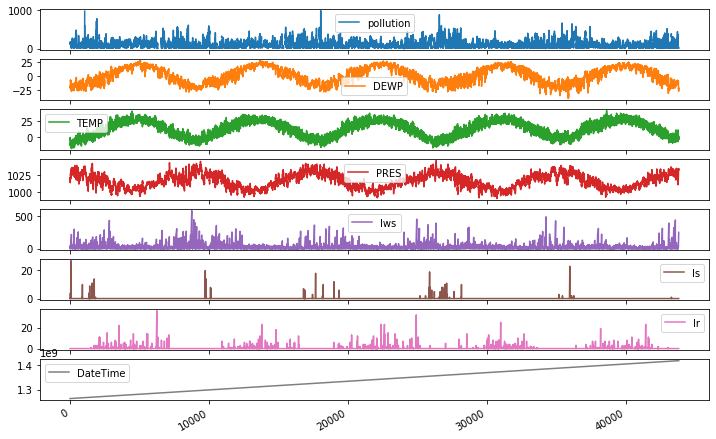

In [274]:
df.plot(subplots=True, figsize=(12,8))

# 2- Preprocessing Dataset

### We can see that the dataset looks like time series data as it has day hour month and year. We must convert our dates into a standard format. So, we convert these columns into a timestamp.

In [2]:
import datetime

df['hour'] = df['hour'].replace(24,0)
df['DateTime'] = df[['year', 'month', 'day', 'hour']].apply(lambda s : datetime.datetime(*s),axis = 1)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'] = df.DateTime.values.astype(np.int64) // 10 ** 9 

df

,No,year,month,day,hour,pollution,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DateTime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,1262304000
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,1262307600
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,1262311200
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,1262314800
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,1262318400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,1420052400
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,1420056000
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,1420059600
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,1420063200


### Remove the unwanted columns
- We maintain "DateTime" column in the previous block. Removing 'No' column, as it is not relevant.

In [3]:
try:
  df.drop('No',axis = 1,inplace= True)
  df.drop('year',axis = 1,inplace= True)
  df.drop('month',axis = 1,inplace= True)
  df.drop('day',axis = 1,inplace= True)
  df.drop('hour',axis = 1,inplace= True)
  print(df.shape)
except:
  print(df.shape)
  #print("Already Done")

df = df.sort_values(by='DateTime',ascending=True)

# df = df.set_index('DateTime') # define DateTime columns as a index

df.head(3)

(43824, 9)


,pollution,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DateTime
0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,1262304000
1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,1262307600
2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,1262311200


### Calculation Null Values and Filling Them with Mean Values
- As a result, we could see there are 2067 NA values for pollution column. This column is our target column. Because of its importance we can not remove easily Null values.

In [4]:
print("Null values:\n\n",df.isnull().sum())
#Remvoing Null values
#df = df.dropna()
#print("\nNull values:\n\n",df.isnull().sum())
df.shape

Null values:

 pollution    2067
DEWP            0
TEMP            0
PRES            0
cbwd            0
Iws             0
Is              0
Ir              0
DateTime        0
dtype: int64


(43824, 9)

In [5]:
df_new=df
df_new = df_new.assign(pollution=df_new.pollution.fillna(df_new.pollution.mean()))
df_new

,pollution,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DateTime
0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0,1262304000
1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0,1262307600
2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0,1262311200
3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0,1262314800
4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0,1262318400
...,...,...,...,...,...,...,...,...,...
43819,8.000000,-23,-2.0,1034.0,NW,231.97,0,0,1420052400
43820,10.000000,-22,-3.0,1034.0,NW,237.78,0,0,1420056000
43821,10.000000,-22,-3.0,1034.0,NW,242.70,0,0,1420059600
43822,8.000000,-22,-4.0,1034.0,NW,246.72,0,0,1420063200


### Finding and Removing Outliers
- The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data. Often machine learning modeling, and model skill in general, can be improved by understanding or even removing these outliers. 
- In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. If there is an outlier it will plotted as point in the boxplot but other population will be grouped together and display as boxes. 

In [6]:
print("Shape of dataframe before removing outliers",df_new.shape)

Q1=df_new['pollution'].quantile(0.25)
Q3=df_new['pollution'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

df_new = df_new[df_new['pollution'] < Upper_Whisker]

print("\nShape of dataframe after removing outliers",df_new.shape)

Shape of dataframe before removing outliers (43824, 9)

Shape of dataframe after removing outliers (41707, 9)


### Checking correlations between the independent variables
- It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. This knowledge can help you better prepare your data to meet the expectations of machine learning algorithms, such as linear regression, whose performance will degrade with the presence of these interdependencies.

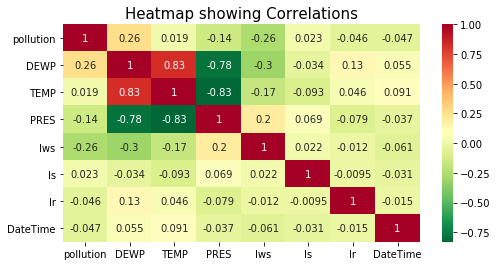

,pollution,DEWP,TEMP,PRES,Iws,Is,Ir,DateTime
pollution,1.000000,0.264816,0.019230,-0.138644,-0.256369,0.022872,-0.046406,-0.047136
DEWP,0.264816,1.000000,0.827722,-0.782181,-0.303421,-0.033901,0.125221,0.054822
TEMP,0.019230,0.827722,1.000000,-0.830913,-0.172675,-0.093064,0.045779,0.090853
PRES,-0.138644,-0.782181,-0.830913,1.000000,0.196201,0.068636,-0.078797,-0.036756
Iws,-0.256369,-0.303421,-0.172675,0.196201,1.000000,0.022398,-0.012442,-0.061109
Is,0.022872,-0.033901,-0.093064,0.068636,0.022398,1.000000,-0.009516,-0.031405
Ir,-0.046406,0.125221,0.045779,-0.078797,-0.012442,-0.009516,1.000000,-0.015034
DateTime,-0.047136,0.054822,0.090853,-0.036756,-0.061109,-0.031405,-0.015034,1.000000


In [7]:
plt.figure(figsize=(8,4))
sns.heatmap(df_new.corr(), cmap='RdYlGn_r',annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show()

df_new.corr()

- TEMP is highly correlated with PRES and DEWP as the correlation coefficient is more than 0.8. So removing TEMP. Also removing PRES since it is also highly correlated with DEWP. 

In [ ]:
try:
  df_new.drop(['TEMP','PRES'],axis = 1,inplace= True)
except:
  print('Already Dropped')
print(df_new.head())

plt.figure(figsize=(8,4))
sns.heatmap(df_new.corr(), cmap='RdYlGn_r',annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show() 

### Split Dataset into training and test data 
- To generate it sequentially as time is important, we kept 'Shuffle=False'

In [8]:
from sklearn.model_selection import train_test_split

# input columns
X=df_new[['DateTime', 'DEWP','Iws','Is','Ir']]

# X = df.drop(['pm2.5'], axis=1) or use this easily
# Column to predict-output
y=df_new['pollution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,shuffle= False)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((33365, 5), (33365,), (8342, 5), (8342,))

# 3- Machine Learninig Model

### Feature scaling
- Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. Encoding the categorical features and Standardizing the numerical features. Using ColumnTransformer which will use OneHotEncoder for categorical attributes and StandardScaler for numerical attributes.

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder

num_attr = ["DEWP","Is","Ir","Iws"]


full_pipeline = ColumnTransformer([
 ("num", StandardScaler(), num_attr),
 ])
X_train_tr = full_pipeline.fit_transform(X_train)
X_test_tr = full_pipeline.transform(X_test)

print(X_train_tr.shape)
print(X_test_tr.shape)

(33365, 4)
(8342, 4)


In [10]:
#Building a stochastic gradient descent regressor and training the model
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train_tr, y_train)
y_pred_train = sgd.predict(X_train_tr)

In [11]:
#Predicting using model and evaluating model using RMSE, MAE and R-squared

from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_test = sgd.predict(X_test_tr)

Mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train = np.sqrt(Mse_train)
print("Root Mean Square Error for training set is ",Rmse_train)

Mse_test = mean_squared_error(y_test, y_pred_test)
Rmse_test = np.sqrt(Mse_test)
print("\nRoot Mean Square Error for test set is ",Rmse_test)

Mae_train = mean_absolute_error(y_train, y_pred_train)
Mae_test = mean_absolute_error(y_test, y_pred_test)
print("\nMean Absolute Error for training set is ",Mae_train)
print("\nMean Absolute Error for test set is ",Mae_test)

r_squared_train = sgd.score(X_train_tr, y_train)
r_squared_test = sgd.score(X_test_tr, y_test)
print("\nR-squared for training set is ",r_squared_train)
print("\nR-squared for test set is ",r_squared_test)

Root Mean Square Error for training set is  61.43683979425397

Root Mean Square Error for test set is  62.64632816323332

Mean Absolute Error for training set is  48.364946273784355

Mean Absolute Error for test set is  50.509765983772596

R-squared for training set is  0.12522789745329221

R-squared for test set is  0.04137463555006793


- The evaluation metrics used to evaluate the model are Root Mean Square Error, Mean Absolute Error and R-squared. I am using these metrics because these are suitable to be used for regression models. R-Square measures how much of variability in dependent variable is being explained by the model. RMSE and MAE are different ways to measure the error of a model. 

In [12]:
#Hyper-parameters tuning in SGD using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

print("The Different hyperparameters in SGDRegressor along with their current values are:\n\n",sgd.get_params())

parameters = {'average': [True, False],
              'alpha':[0.0001,0.001,0.01,0.1],
              'loss': ['squared_loss','huber'],
              'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'penalty':['l2'],
              'eta0':[0.001,0.01,0.1]
             }

search = RandomizedSearchCV(estimator=sgd, param_distributions = parameters, cv = 3, n_iter = 10, n_jobs=-1)

result = search.fit(X_train_tr, y_train)

# summarize result
print(" \nResults from Randomized Search:\n" )
print('Best Score: %s' % result.best_score_)
print('\nBest Hyperparameters: %s' % result.best_params_)

The Different hyperparameters in SGDRegressor along with their current values are:

 {'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 1000, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
 
Results from Randomized Search:

Best Score: 0.10938913027476312

Best Hyperparameters: {'penalty': 'l2', 'loss': 'squared_loss', 'learning_rate': 'invscaling', 'eta0': 0.1, 'average': True, 'alpha': 0.0001}


- Above mentioned are the different hyper-parameters in SGDRegressor which can be changed to fine tune the model. Out of all these parameters I am tuning the parameters average, alpha, loss, learning_rate, penalty, eta0 and max_iterations. 
- I have used RandomizedSearchCV to find out the best parameter values as suited for the model. The best hyperparameters value returned by RandomizedSearchCV are mentioned in the output above.  I have run the model specifying these best hyper-parameter values in the below block of code.

In [13]:
sgd = SGDRegressor(random_state=42, alpha= 0.001, average=False, learning_rate= 'invscaling',
                   max_iter=5000, eta0=0.01, loss= 'squared_loss',penalty= 'l2')
sgd.fit(X_train_tr, y_train)
y_pred_train = sgd.predict(X_train_tr)
y_pred = sgd.predict(X_test_tr)

Mse_train = mean_squared_error(y_train, y_pred_train)
Rmse_train = np.sqrt(Mse_train)
print("Root Mean Square Error for training set is ",Rmse_train)

Mse_test = mean_squared_error(y_test, y_pred)
Rmse_test = np.sqrt(Mse_test)
print("\nRoot Mean Square Error for test set is ",Rmse_test)

Mae_train = mean_absolute_error(y_train, y_pred_train)
Mae_test = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error for training set is ",Mae_train)
print("\nMean Absolute Error for test set is ",Mae_test)

r_squared_train = sgd.score(X_train_tr, y_train)
r_squared_test = sgd.score(X_test_tr, y_test)
print("\nR-squared for training set is ",r_squared_train)
print("\nR-squared for test set is ",r_squared_test)

Root Mean Square Error for training set is  61.4367955408681

Root Mean Square Error for test set is  62.64462315281055

Mean Absolute Error for training set is  48.36536266437475

Mean Absolute Error for test set is  50.5086443011026

R-squared for training set is  0.12522915766177944

R-squared for test set is  0.04142681559137784


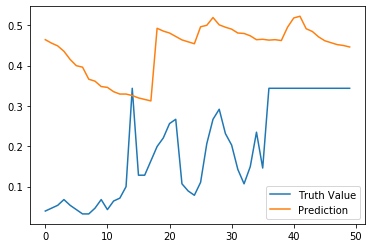

In [14]:
# Ploting the graph

y_test= (y_test-min(y_test))/(max(y_test)-min(y_test))
y_pred=  (y_pred-min(y_pred))/(max(y_pred)-min(y_pred))

plt.plot(np.array(y_test[:50]),label='Truth Value')
plt.plot(np.array(y_pred[:50]),label='Prediction')
plt.legend()
plt.show()

# 4- Deep Learning Model

### Feature scaling
- This is done to transform raw data into a standardized dataset so that so that they fall in a specific range of values. MinMaxScaler is used which transforms the data in the range between 0 and 1.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


Feature Variance:

[0.55724294 0.37889551 0.0468239  0.01158177 0.00545588]

Cumulative Feature Variance:

[0.55724294 0.93613845 0.98296235 0.99454412 1.        ]


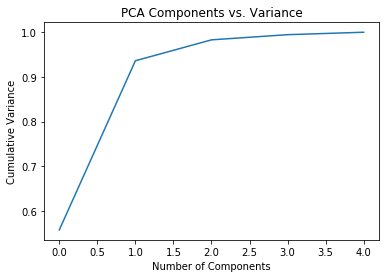

In [16]:
from sklearn.decomposition import PCA

# Finding optimal number of components for dimensionality reduction
pca = PCA(n_components=None)
pca.fit(X_train_scaled)
feature_variance = pca.explained_variance_ratio_
total_variance = np.cumsum(feature_variance)  # cumulative sum

print('\nFeature Variance:\n')
print(feature_variance)
print('\nCumulative Feature Variance:\n')
print(total_variance)

plt.plot(total_variance)
plt.title('PCA Components vs. Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [17]:
# Selecting 6 Components
pca_X = PCA(n_components=4)
X_train_pca = pca_X.fit_transform(X_train_scaled)
X_test_pca = pca_X.transform(X_test_scaled)

In [18]:
pca_columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4']
X_train_pca = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca = pd.DataFrame(X_test_pca, columns=pca_columns)

In [19]:
X_train_lstm = np.array(X_train_pca) #X_train_scaled
X_train_lstm = X_train_lstm[:, :, None]
print(X_train_lstm.shape)
X_test_lstm = np.array(X_test_pca)#X_test_scaled
X_test_lstm = X_test_lstm[:, :, None]
print(X_test_lstm.shape)

(33365, 4, 1)
(8342, 4, 1)


In [20]:
#!pip install keras-tuner

import pickle
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense, Dropout

import kerastuner
from kerastuner.tuners.bayesian import BayesianOptimization
from kerastuner.tuners.randomsearch import RandomSearch

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
# vanilla lstm model
def lstm_model():
    model = keras.Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
    model.add(Dropout(0.4))
    model.add(LSTM(units=16))
    model.add(Dropout(0.4))
    model.add(Dense(units=8))
    model.add(Dropout(0.4))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss = 'mse',metrics=['mae', 'mse'])
    return model

In [46]:
from keras.wrappers.scikit_learn import KerasRegressor

regressor = KerasRegressor(build_fn=lstm_model, batch_size=64, epochs=30)

In [47]:
results=regressor.fit(X_train_lstm, y_train)

Epoch 1/30
522/522 [==============================] - 2s 4ms/step - loss: 7223.7852 - mae: 63.3215 - mse: 7223.7852
Epoch 2/30
522/522 [==============================] - 2s 4ms/step - loss: 5147.9429 - mae: 56.0086 - mse: 5147.9429
Epoch 3/30
522/522 [==============================] - 2s 4ms/step - loss: 4853.2793 - mae: 53.3051 - mse: 4853.2793
Epoch 4/30
522/522 [==============================] - 2s 4ms/step - loss: 4617.7583 - mae: 51.3873 - mse: 4617.7583
Epoch 5/30
522/522 [==============================] - 2s 4ms/step - loss: 4534.9966 - mae: 50.8019 - mse: 4534.9966
Epoch 6/30
522/522 [==============================] - 2s 4ms/step - loss: 4494.0088 - mae: 50.4818 - mse: 4494.0088
Epoch 7/30
522/522 [==============================] - 2s 4ms/step - loss: 4458.0864 - mae: 50.3415 - mse: 4458.0864
Epoch 8/30
522/522 [==============================] - 2s 4ms/step - loss: 4446.4766 - mae: 50.1545 - mse: 4446.4766
Epoch 9/30
522/522 [==============================] - 2s 4ms/step - loss

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def regression_report(y_true, y_pred):
    print("mean_squared_error: {}".format(mean_squared_error(y_true, y_pred)))  # should be close to 0
    print("mean_absolute_error: {}".format(mean_absolute_error(y_true, y_pred)))  # should be close to 0
    print("r2_score: {}".format(r2_score(y_true, y_pred)))  # should be close to 1

In [49]:
y_pred = regressor.predict(X_test_lstm)
regression_report(y_test, y_pred)

mean_squared_error: 6880.60412272085
mean_absolute_error: 79.47077527167954
r2_score: -132706.93296918992


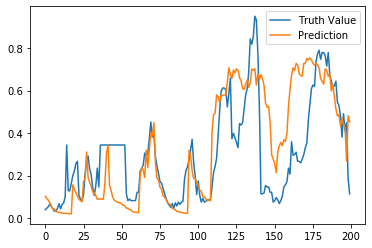

In [50]:
y_test= (y_test-min(y_test))/(max(y_test)-min(y_test))
y_pred=  (y_pred-min(y_pred))/(max(y_pred)-min(y_pred))

plt.plot(np.array(y_test[:200]),label='Truth Value')
plt.plot(np.array(y_pred[:200]),label='Prediction')
plt.legend()
plt.show()

- As we can see, the deep learning technique needs more data to work well, So we can try to fine tune the data what we have already.

In [54]:
# tune optimizer
def tune_model_nn(hp):
    model = keras.Sequential()
    model.add(LSTM(units=hp.Int('units_start', min_value=8, max_value=128, step=16), 
                   return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
    model.add(Dropout(rate=hp.Choice('drop_rate_start', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])))

    for i in range(hp.Int('num_layers', 1, 6)):
        model.add(LSTM(units=hp.Int('units_' + str(i), min_value=8, max_value=128, step=16), return_sequences=True))
        model.add(Dropout(rate=hp.Choice('drop_rate_' + str(i), [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])))

    model.add(LSTM(units=hp.Int('units_end',min_value=8,max_value=128,step=16)))
    model.add(Dropout(rate=hp.Choice('drop_rate_end', [0.0, 0.1, 0.2, 0.3, 0.4, 0.5])))
    model.add(Dense(units=1))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  loss = 'mean_squared_error', metrics=['mae', 'mse'])
    return model

In [55]:
!rm -rf exec_data  # delete the previous execution data

MAX_TRIALS = 8    # TODO: 40
EXECUTIONS_PER_TRIAL = 1     # TODO: 3 or 5
TRAIN_EPOCHS = 5

tuner = BayesianOptimization(
    tune_model_nn,
    objective=kerastuner.Objective('loss', 'min'),
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTIONS_PER_TRIAL,
    directory='exec_data',
    project_name='lstm_nn'
)
print(tuner.search_space_summary())
tuner.search(x=X_train_lstm, y=y_train, epochs=TRAIN_EPOCHS, 
             validation_data=(X_test_lstm, y_test))
print(tuner.results_summary())

Trial 8 Complete [00h 00m 59s]
loss: 4385.41162109375

Best loss So Far: 3987.24560546875
Total elapsed time: 00h 10m 22s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in exec_data/lstm_nn
Showing 10 best trials
Objective(name='loss', direction='min')
Trial summary
Hyperparameters:
units_start: 24
drop_rate_start: 0.0
num_layers: 4
units_0: 24
drop_rate_0: 0.1
units_end: 120
drop_rate_end: 0.5
learning_rate: 0.001
units_1: 40
drop_rate_1: 0.5
units_2: 56
drop_rate_2: 0.2
units_3: 40
drop_rate_3: 0.4
Score: 3987.24560546875
Trial summary
Hyperparameters:
units_start: 8
drop_rate_start: 0.5
num_layers: 4
units_0: 104
drop_rate_0: 0.4
units_end: 120
drop_rate_end: 0.5
learning_rate: 0.001
units_1: 8
drop_rate_1: 0.0
units_2: 8
drop_rate_2: 0.0
units_3: 8
drop_rate_3: 0.0
Score: 4119.40185546875
Trial summary
Hyperparameters:
units_start: 72
drop_rate_start: 0.2
num_layers: 5
units_0: 24
drop_rate_0: 0.0
units_end: 120
drop_rate_end: 0.1
learning_rate: 0.01
units_1: 24
drop

In [56]:
# Get best model
print(tuner.results_summary())

Results summary
Results in exec_data/lstm_nn
Showing 10 best trials
Objective(name='loss', direction='min')
Trial summary
Hyperparameters:
units_start: 24
drop_rate_start: 0.0
num_layers: 4
units_0: 24
drop_rate_0: 0.1
units_end: 120
drop_rate_end: 0.5
learning_rate: 0.001
units_1: 40
drop_rate_1: 0.5
units_2: 56
drop_rate_2: 0.2
units_3: 40
drop_rate_3: 0.4
Score: 3987.24560546875
Trial summary
Hyperparameters:
units_start: 8
drop_rate_start: 0.5
num_layers: 4
units_0: 104
drop_rate_0: 0.4
units_end: 120
drop_rate_end: 0.5
learning_rate: 0.001
units_1: 8
drop_rate_1: 0.0
units_2: 8
drop_rate_2: 0.0
units_3: 8
drop_rate_3: 0.0
Score: 4119.40185546875
Trial summary
Hyperparameters:
units_start: 72
drop_rate_start: 0.2
num_layers: 5
units_0: 24
drop_rate_0: 0.0
units_end: 120
drop_rate_end: 0.1
learning_rate: 0.01
units_1: 24
drop_rate_1: 0.4
units_2: 72
drop_rate_2: 0.0
units_3: 72
drop_rate_3: 0.0
units_4: 8
drop_rate_4: 0.0
Score: 4327.1298828125
Trial summary
Hyperparameters:
units_s

In [57]:
print('Bayesion Optimization Hyperparameters:')
tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values

Bayesion Optimization Hyperparameters:


{'units_start': 24,
 'drop_rate_start': 0.0,
 'num_layers': 4,
 'units_0': 24,
 'drop_rate_0': 0.1,
 'units_end': 120,
 'drop_rate_end': 0.5,
 'learning_rate': 0.001,
 'units_1': 40,
 'drop_rate_1': 0.5,
 'units_2': 56,
 'drop_rate_2': 0.2,
 'units_3': 40,
 'drop_rate_3': 0.4}

In [58]:
bo_best_model = tuner.get_best_models()[0]
bo_best_model.fit(X_train_lstm, y_train)

print('Bayesion Optimization Results:')
y_pred = bo_best_model.predict(X_test_lstm)
regression_report(y_test, y_pred)

1043/1043 [==============================] - 11s 10ms/step - loss: 3724.6250 - mae: 46.9840 - mse: 3724.6250
Bayesion Optimization Results:
mean_squared_error: 8418.64741401148
mean_absolute_error: 88.75807525510267
r2_score: -162371.55868574636


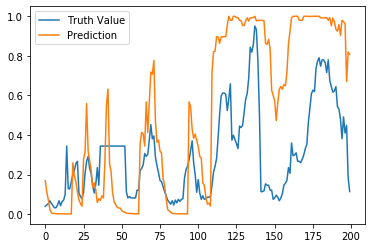

In [59]:
y_test= (y_test-min(y_test))/(max(y_test)-min(y_test))
y_pred=  (y_pred-min(y_pred))/(max(y_pred)-min(y_pred))

plt.plot(np.array(y_test[:200]),label='Truth Value')
plt.plot(np.array(y_pred[:200]),label='Prediction')
plt.legend()
plt.show()